CREDIT CARD FRAUD DETECTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [4]:
print(data.shape)

(284807, 31)


In [5]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<Axes: >

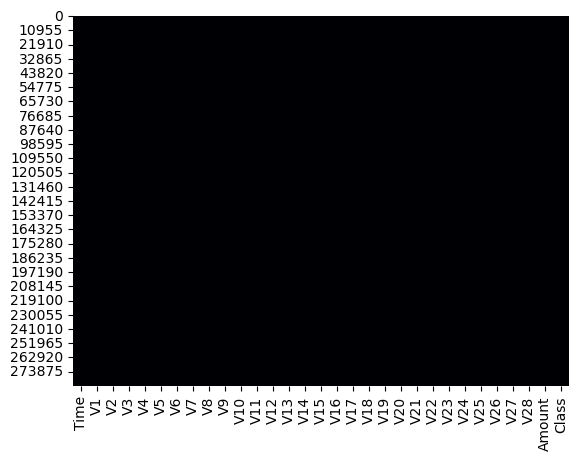

In [7]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False)

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


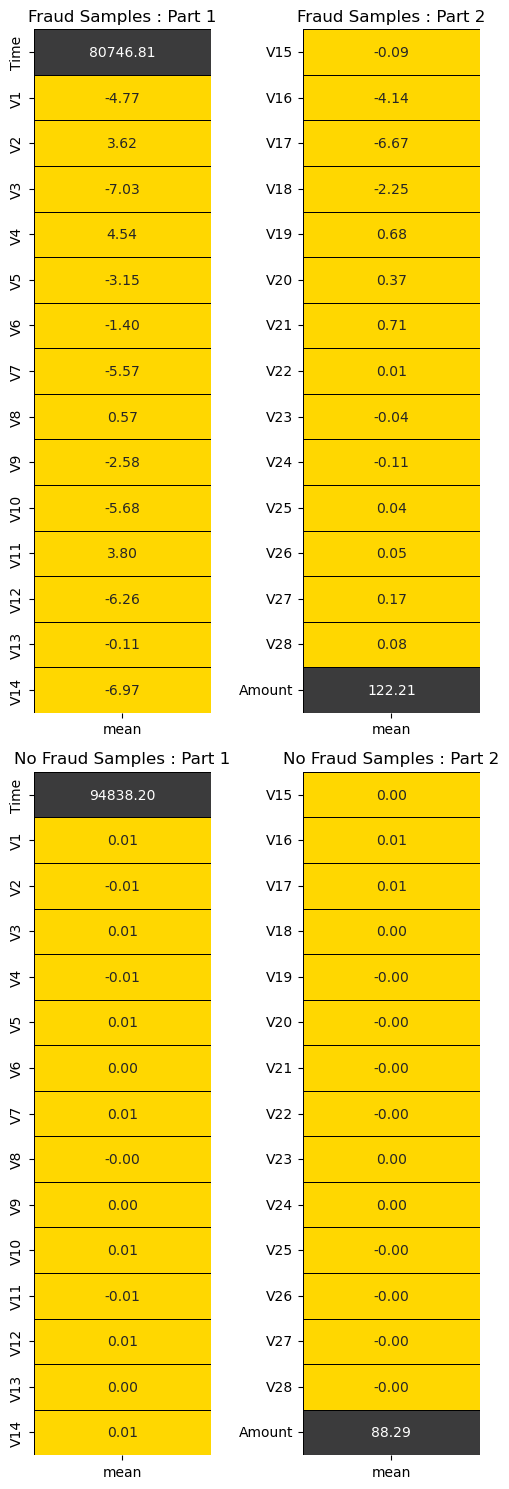

In [9]:
fraud = data[data['Class'] == 1].describe().T
nofraud = data[data['Class'] == 0].describe().T

colors = ['#FFD700','#3B3B3C']

fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (5,15))
plt.subplot(2,2,1)
sns.heatmap(fraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 1');

plt.subplot(2,2,2)
sns.heatmap(fraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 2');

plt.subplot(2,2,3)
sns.heatmap(nofraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 1');

plt.subplot(2,2,4)
sns.heatmap(nofraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 2');

fig.tight_layout(w_pad = 2)


EDA

         Value_counts  Percent
Genuine        284315    99.80
Fraud             492     0.20


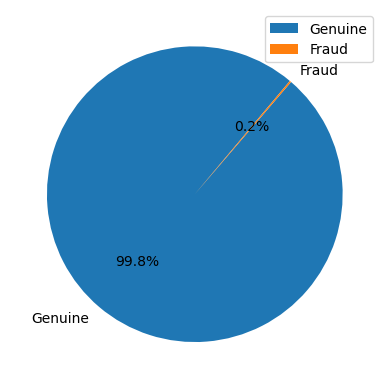

In [12]:
# identifying the count of each class labels
valuecounts = data['Class'].value_counts()
percentage = round(valuecounts*100/valuecounts.sum(),1)
df = pd.DataFrame({'Value_counts':valuecounts,'Percent':percentage})
df.rename(index = {0:'Genuine',1:'Fraud'},inplace = True)
print(df)

# plotting the percentage of each class label using pie chart
plt.pie(data['Class'].value_counts(),labels=['Genuine','Fraud'],
        autopct='%1.1f%%', startangle=50)
plt.legend()
plt.show()

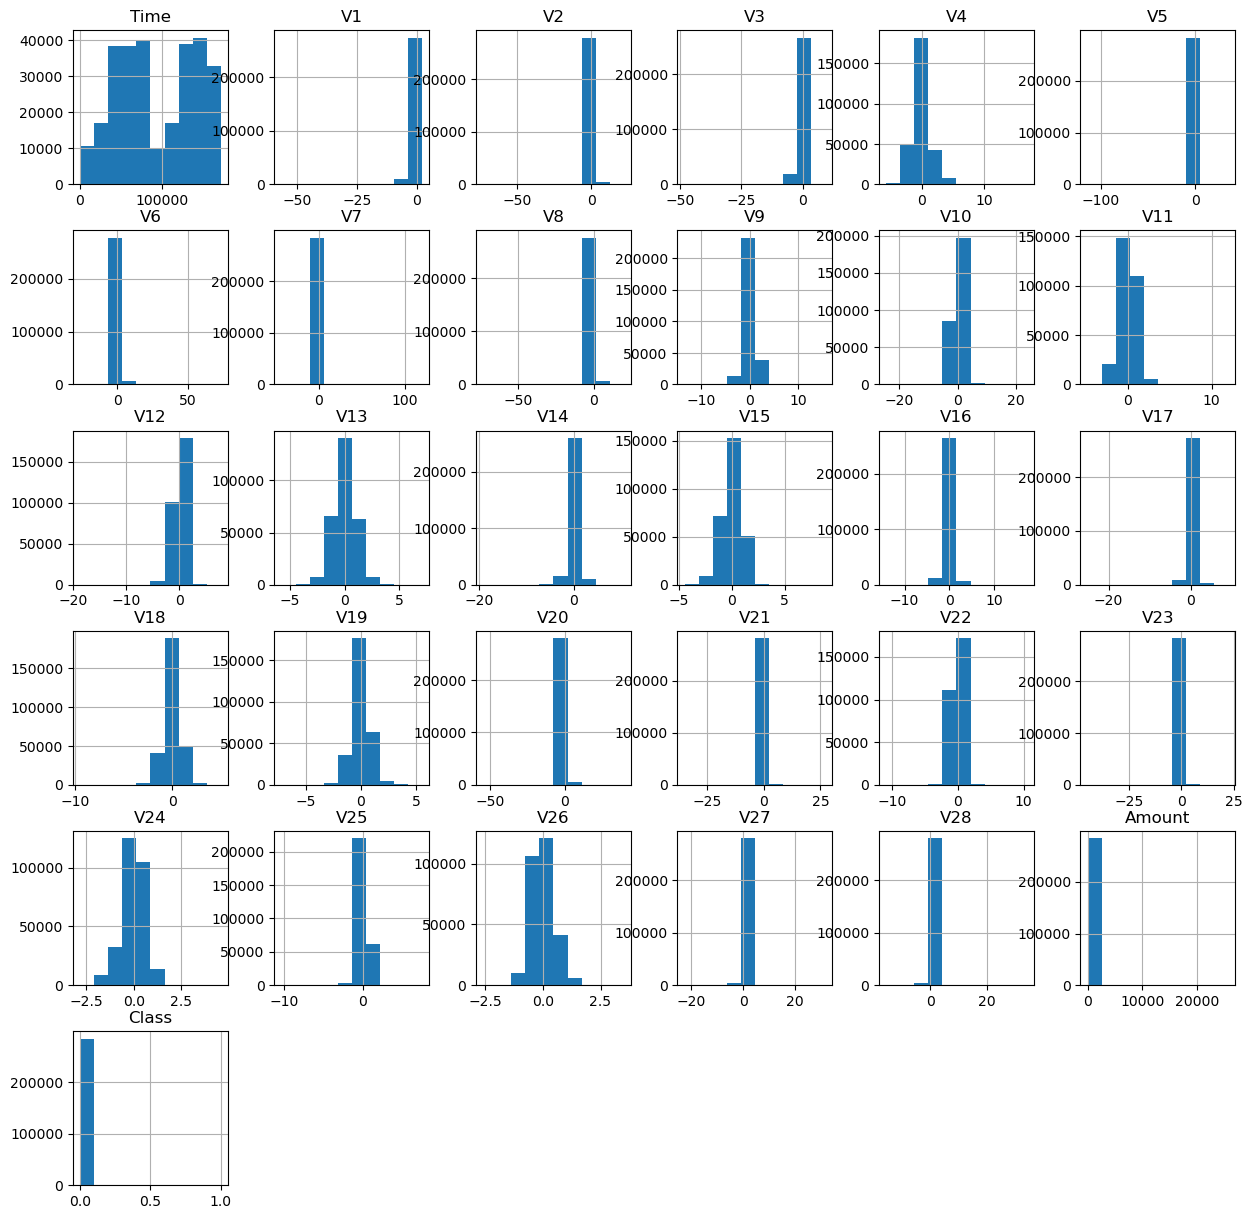

In [13]:
# Now let us see how all the columns are distributed
data.hist(figsize = (15,15))
plt.show()

In [15]:
# separating the dataset based on class labels and assigning them to different vaiables.
genuine = data[data.Class == 0]
fraud = data[data.Class == 1]


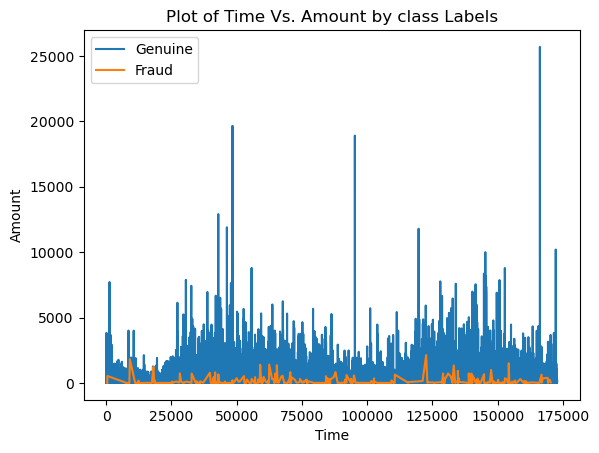

In [16]:
# Plotting Time Vs. Amount by class Labels
plt.plot(genuine.Time,genuine.Amount,label = 'Genuine')
plt.plot(fraud.Time,fraud.Amount,label = 'Fraud')
plt.title("Plot of Time Vs. Amount by class Labels")
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend()
plt.show()

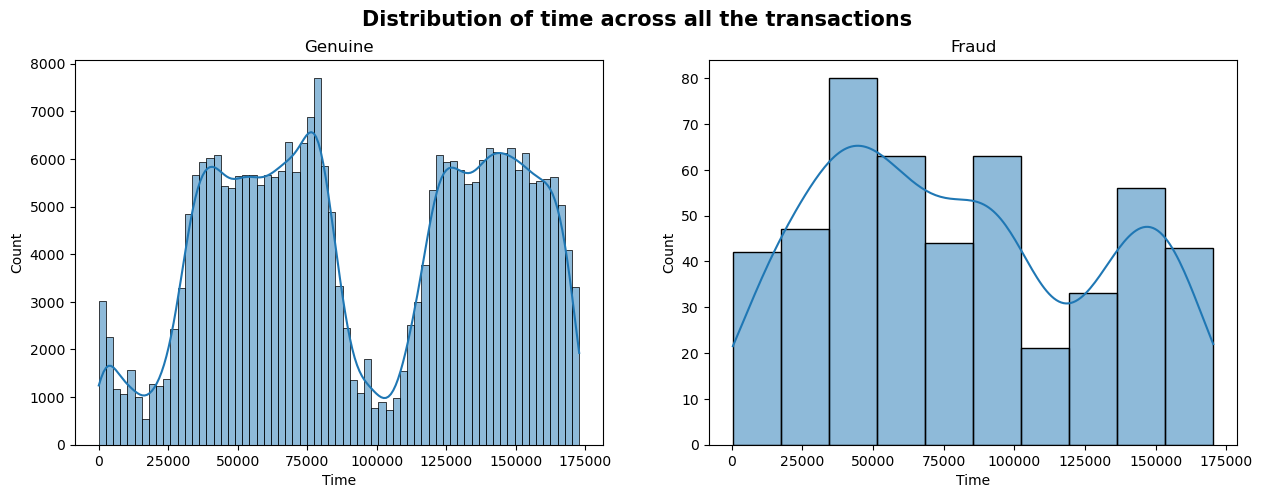

In [17]:
# Plotting to see how time column is distributed accross two class labels
plt.figure(figsize = (15,5))
plt.suptitle("Distribution of time across all the transactions",
             size = '15',weight = 'bold')
plt.subplot(1,2,1)
sns.histplot(genuine.Time,kde = True)# for genuine transactions
plt.title('Genuine')

plt.subplot(1,2,2)
sns.histplot(fraud.Time,kde = True)# for fraudulent transactions
plt.title('Fraud')
plt.show()

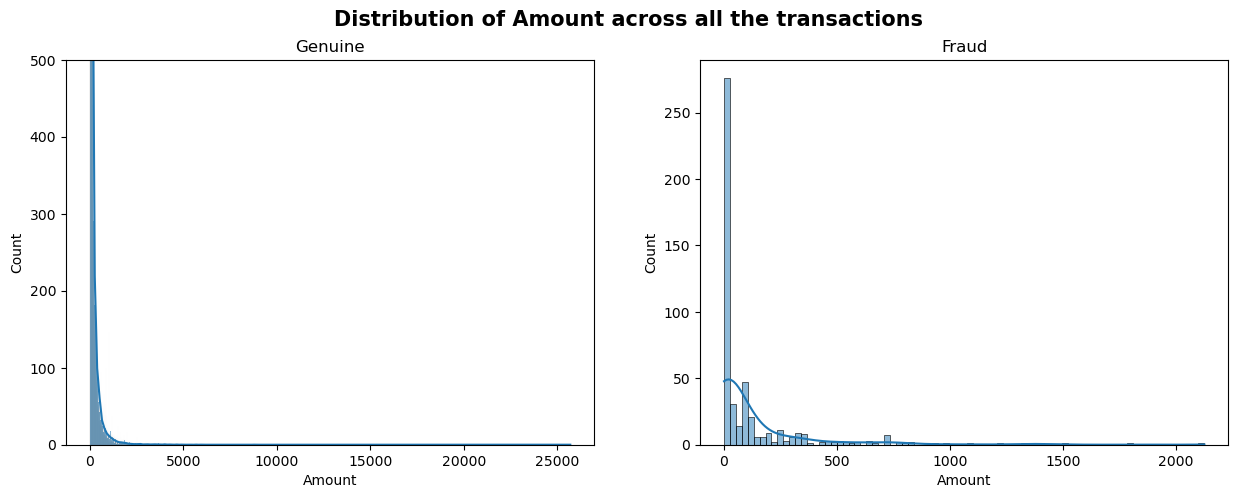

In [18]:
# Plotting to see how transactional amount column is distributed accross two class labels
plt.figure(figsize = (15,5))
plt.suptitle("Distribution of Amount across all the transactions",
             size = '15',weight = 'bold')
plt.subplot(1,2,1)
sns.histplot(genuine.Amount,kde = True)# for genuine transactions
plt.ylim(0,500)
plt.title('Genuine')

plt.subplot(1,2,2)
sns.histplot(fraud.Amount, kde = True)# for fraudulent transactions
plt.title('Fraud')
plt.show()

          count     mean      std    min      25%      50%       75%       max
Class                                                                         
0     284315.00 94838.20 47484.02   0.00 54230.00 84711.00 139333.00 172792.00
1        492.00 80746.81 47835.37 406.00 41241.50 75568.50 128483.00 170348.00


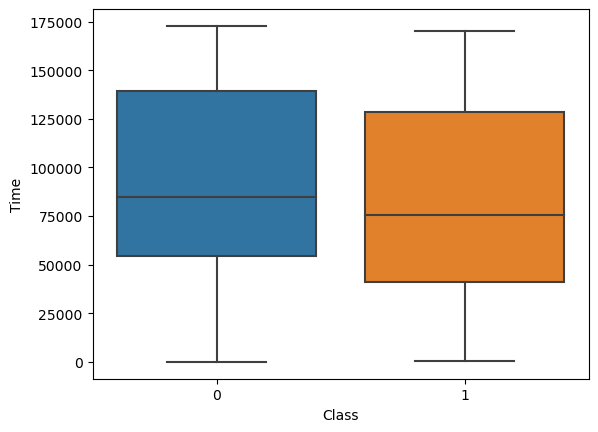

In [19]:
# plotting box plot to find if there is any difference across how the transactions
# took place based on Time. 
print(data.groupby('Class')['Time'].describe())
sns.boxplot(y = data.Time,x = data.Class)
plt.show()

          count   mean    std  min  25%   50%    75%      max
Class                                                        
0     284315.00  88.29 250.11 0.00 5.65 22.00  77.05 25691.16
1        492.00 122.21 256.68 0.00 1.00  9.25 105.89  2125.87




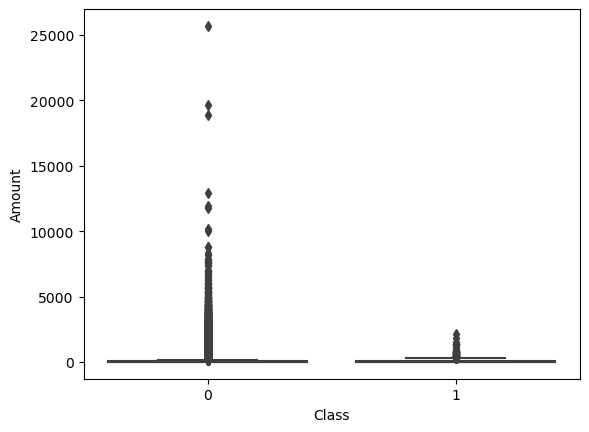

In [20]:
# plotting box plot to find if there is any difference across how the transactions
# took place based on Amount. 
print(data.groupby('Class')['Amount'].describe())
print('\n')
sns.boxplot(y = data.Amount,x = data.Class)
plt.show()

Outlier's detection & removal

In [21]:
# function to dectect the range on which above or below outliers may exist
# it is done based on the metrics of boxplot
def outliers(arr):
    """
    * input:
        arr: Takes an array or pandas series as an input.
    
    --> calculates the iqr based on percentiles.
    --> counts the number of ouliers
    
    * Output returns: 
        upper_fence:upper limit to detect outliers
        lower_fence:lower limit to detect outliers
        outliers_count: number of outliers
    """
    per25,per75 = np.percentile(arr,[25,75])
    mean = np.mean(arr)
    iqr = per75 - per25
    upper_fence = mean + 1.5*iqr
    lower_fence = mean - 1.5*iqr
    outliers_count = ((arr > upper_fence) | (arr < lower_fence)).sum()
    return upper_fence,lower_fence,outliers_count


In [22]:
# to find the ouliers in both Genuine & fraudulent transactions
print("Number of outliers in Legit amount transactions: ",outliers(genuine.Amount)[2])
print("Number of outliers in fraud amount transactions: ",outliers(fraud.Amount)[2])

Number of outliers in Legit amount transactions:  30081
Number of outliers in fraud amount transactions:  66


In [23]:
# using outlier func to get the range for oulier detection
genamnt_outliers = outliers(genuine.Amount)
frdamnt_outliers = outliers(fraud.Amount)
l_out = genuine[genuine.Amount <= genamnt_outliers[0]]# removing outliers
f_out = fraud[fraud.Amount <= frdamnt_outliers[0]]# removing outliers
print("genuine:\n upper fence:{} lower fence:{} ouliers count:{}"
     .format(genamnt_outliers[0],genamnt_outliers[1],genamnt_outliers[2]))
print("fradulent:\n upper fence:{} lower fence:{} ouliers count:{}"
     .format(frdamnt_outliers[0],frdamnt_outliers[1],frdamnt_outliers[2]))

genuine:
 upper fence:195.39102242231326 lower fence:-18.80897757768672 ouliers count:30081
fradulent:
 upper fence:279.5463211382114 lower fence:-35.12367886178862 ouliers count:66


In [24]:
# concatenating the dataframe of both genuine & fradulent datasets after outliers removal
df_aft_outliers = pd.concat([l_out,f_out])
df_aft_outliers.shape

(254660, 31)

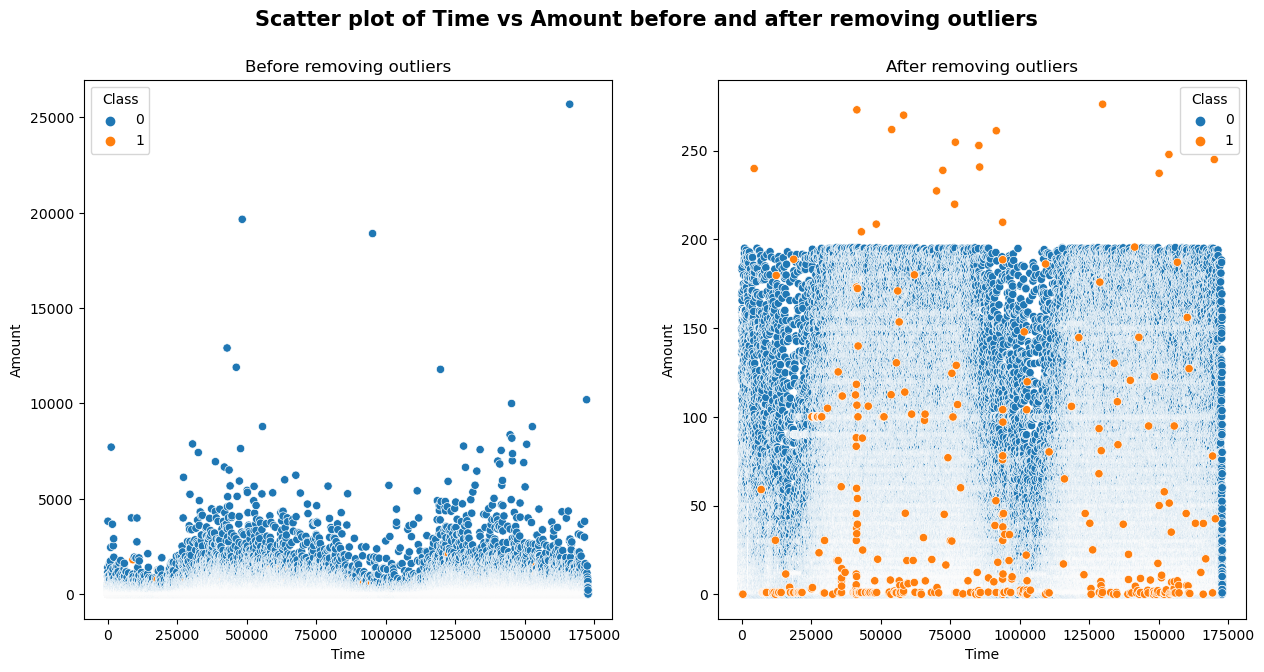

In [25]:
# Scatter plot for time vs amount
plt.figure(figsize=(15,7)) # adding fig size
plt.suptitle("Scatter plot of Time vs Amount before and after removing outliers",
             size = 15,weight = 'bold')
plt.subplot(1,2,1)
sns.scatterplot(data,y = data.Amount,x = data.Time,hue = data.Class)# including outliers
plt.title('Before removing outliers')

plt.subplot(1,2,2)
sns.scatterplot(df_aft_outliers,y = df_aft_outliers.Amount,x = df_aft_outliers.Time,
               hue = df_aft_outliers.Class)# removing outliers
plt.title("After removing outliers")
plt.show()

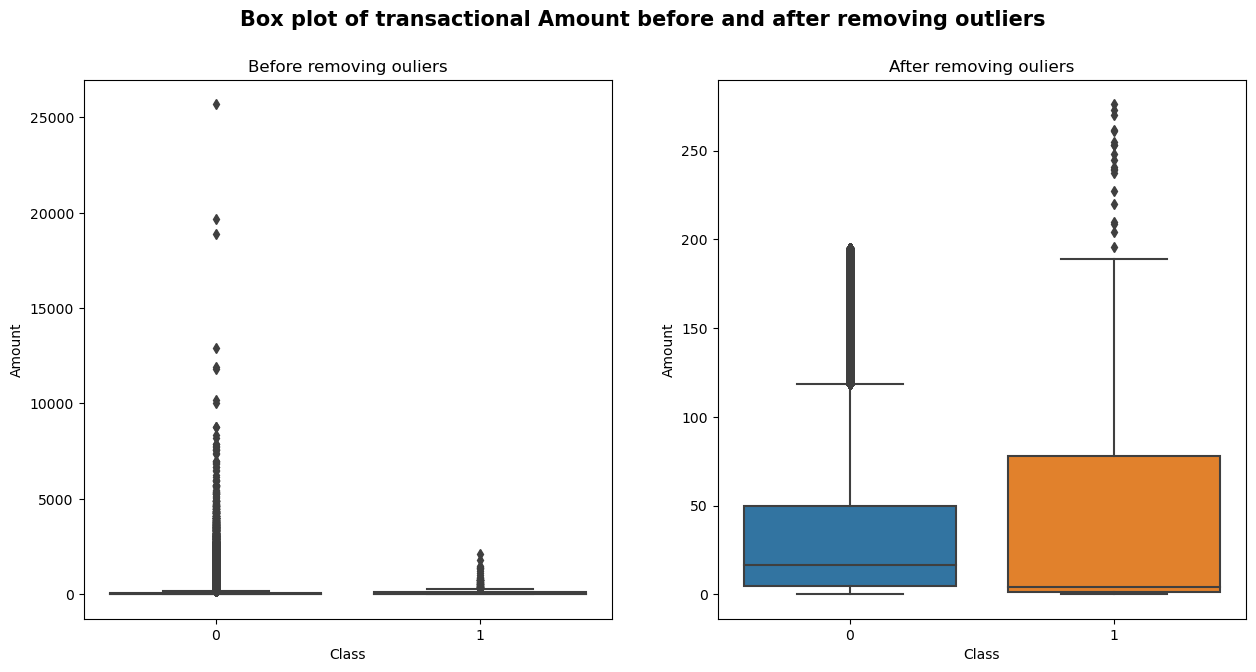

In [26]:
# Box plot of amount column
plt.figure(figsize = (15,7))
plt.suptitle("Box plot of transactional Amount before and after removing outliers ",
             size = 15,weight = 'bold')
plt.subplot(1,2,1)
sns.boxplot(y = data.Amount,x = data.Class)# including outliers
plt.title('Before removing ouliers')

plt.subplot(1,2,2)
sns.boxplot(y = df_aft_outliers.Amount,x = df_aft_outliers.Class)# after removing outliers
plt.title('After removing ouliers')
plt.show()

Correlation

In [27]:
data.corr()['Class'] # correlation between features & target variable

Time     -0.01
V1       -0.10
V2        0.09
V3       -0.19
V4        0.13
V5       -0.09
V6       -0.04
V7       -0.19
V8        0.02
V9       -0.10
V10      -0.22
V11       0.15
V12      -0.26
V13      -0.00
V14      -0.30
V15      -0.00
V16      -0.20
V17      -0.33
V18      -0.11
V19       0.03
V20       0.02
V21       0.04
V22       0.00
V23      -0.00
V24      -0.01
V25       0.00
V26       0.00
V27       0.02
V28       0.01
Amount    0.01
Class     1.00
Name: Class, dtype: float64

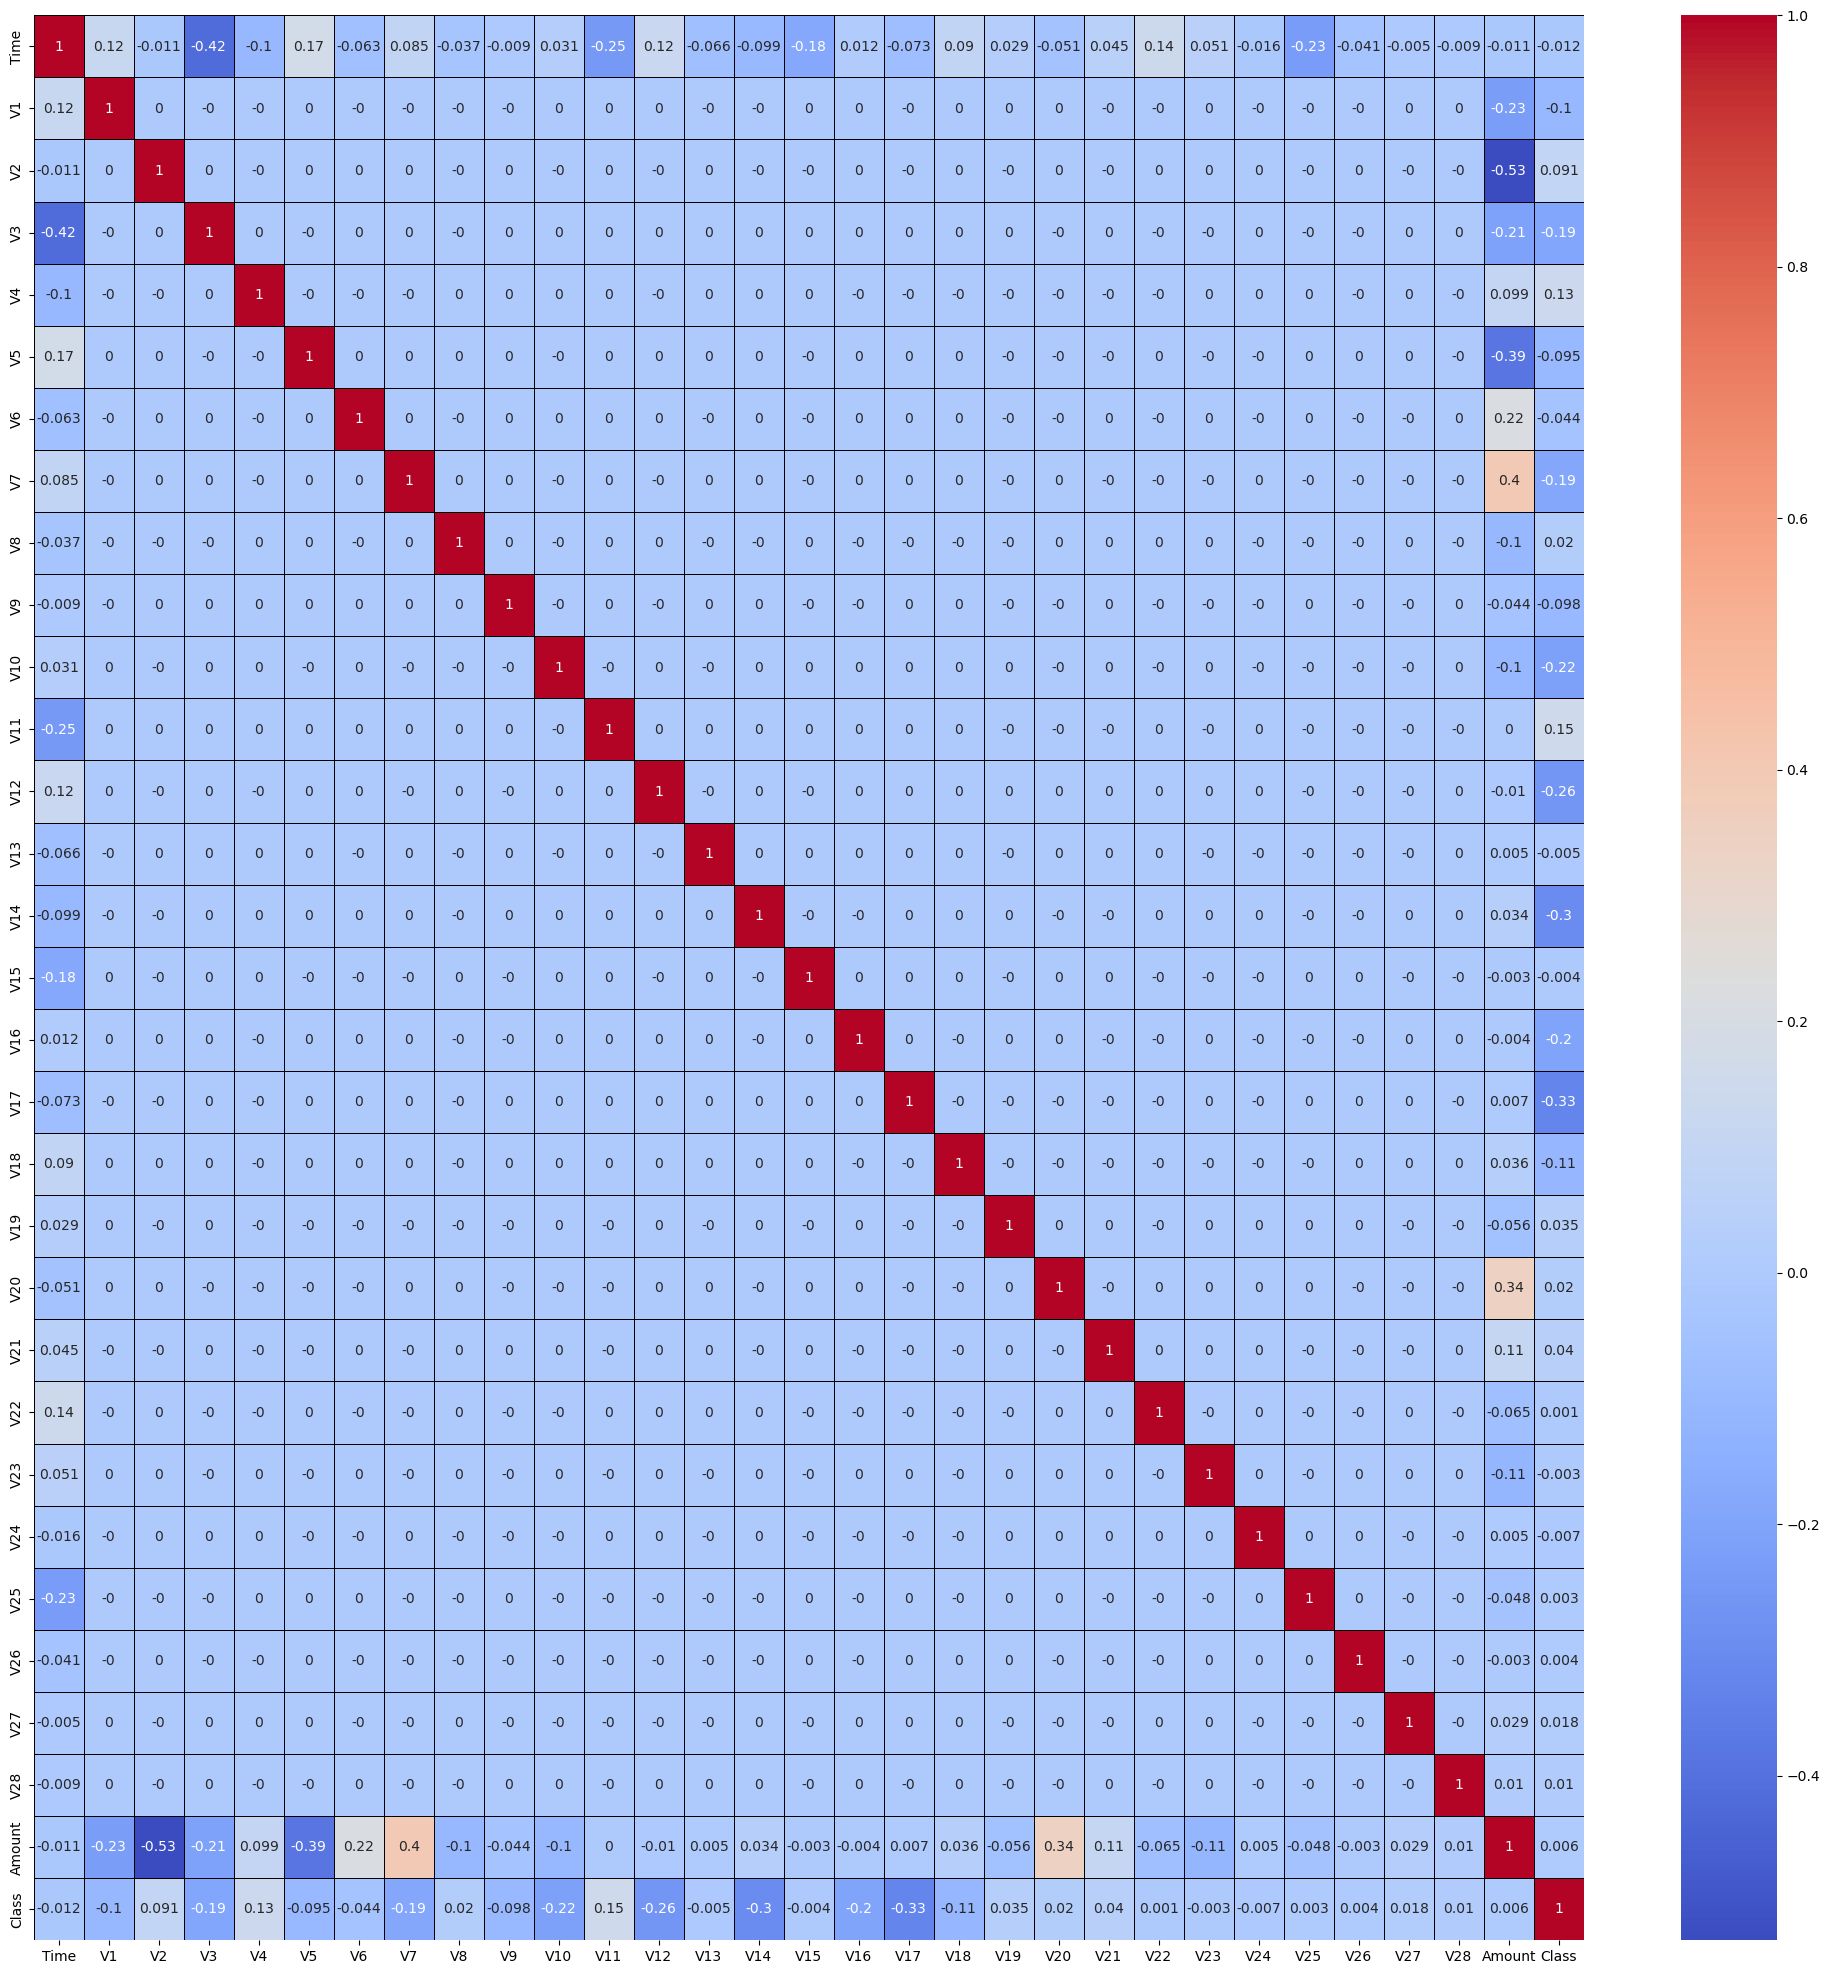

In [28]:
# correlation between all numerical features 
plt.figure(figsize=(25,25))
sns.heatmap(round(data.corr(),3),annot = True,cmap = 'coolwarm',
            linewidths = 0.5 ,linecolor='black')# plotting correlation heatmap
plt.show()
